# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Wahyu Pelita Jaya
- **Email:** wahyupelitajaya1@gmail.com
- **ID Dicoding:** wahyupj

## Menentukan Pertanyaan Bisnis

1. Apakah musim memiliki pengaruh terhadap perilaku penyewaan sepeda?

2. Bagaimana pola penyewaan sepeda antara hari kerja dan hari libur?

3. Seperti apa dampak kondisi cuaca terhadap jumlah pengguna sepeda.

## Import Semua Packages/Library yang Digunakan

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

**Mempersiapkan Dataset yang akan di Analisis**

In [119]:
# Load dataset harian dari repository github (day.csv)
day_df = pd.read_csv("https://raw.githubusercontent.com/wahyupelitajaya/Dicoding-Submission-Analysis-Data/refs/heads/main/data/day.csv")

# Cek apakah berhasil di import atau tidak dengan cara menampilkan dataset
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [120]:
# Load dataset jam-an dari repository github (hour.csv)
hour_df = pd.read_csv("https://raw.githubusercontent.com/wahyupelitajaya/Dicoding-Submission-Analysis-Data/refs/heads/main/data/hour.csv")

# Cek apakah berhasil di import atau tidak dengan cara menampilkan dataset
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai Data day.csv

In [121]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
1. Tidak ada Missing Values : Semua kolom memiliki jumlah entri non-null yang sama dengan total jumlah baris (731), sehingga dataset ini bersih dari Missing Values
2. Dominasi tipe data numerik : Sebagian besar kolom adalah numerik (int64 atau float64), yang cocok untuk analisis statistik atau pemodelan prediktif.
3. Tanggal dalam format String : Kolom 'dteday' masih bertipe object(text), yang memerlukan konversi ke tipe data datetime untuk analisis waktu / berbasis tanggal

**Memeriksa apakah terdapat duplikasi data**

In [122]:
print("Jumlah duplikasi : ", day_df.duplicated().sum())

Jumlah duplikasi :  0


**Insight:**
Tidak terdapat duplikasi data

**Menampilkan ringkasan parameter statistik untuk mengetahui apakah terdapat innacurate value**

In [123]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight: Tidak ditemukan adanya innacurate value**

#### Menilai data hour.csv

**Melihat Informasi Dataset**

In [124]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
1. Tidak ada Missing Values : Semua kolom memiliki jumlah entri non-null yang sama dengan total jumlah baris (17.379), sehingga dataset ini bersih dari Missing Values
2. Dominasi tipe data numerik : Sebagian besar kolom adalah numerik (int64 atau float64), yang cocok untuk analisis statistik atau pemodelan prediktif.
3. Tanggal dalam format String : Kolom 'dteday' masih bertipe object(text), yang memerlukan konversi ke tipe data datetime untuk analisis waktu / berbasis tanggal

**Memeriksa apakah terdapat duplikasi data**

In [125]:
print("Jumlah duplikasi : ", hour_df.duplicated().sum())

Jumlah duplikasi :  0


**Insight:**
Tidak terdapat duplikasi data

**Menampilkan ringkasan parameter statistik untuk mengetahui apakah terdapat innacurate value**

In [126]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight: Tidak ditemukan adanya innacurate value**

**KESIMPULAN:** Tidak terdapat keanehan pada kedua dataset, hanya perlu merubah tipe data dteday (object) menjadi (datetime) di kedua dataset.

### Cleaning Data

=====================================

----------------- Dataset characteristics -----------------

=====================================

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

#### Cleaning dataset harian (day.csv)

**Tampak data harian (day.csv) sebelum di cleaning**

In [127]:
# Menampilkan dataset day.csv
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Tampak info data harian (day.csv) sebelum di cleaning**

In [128]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Mengganti tipe data kolom dteday (object) menjadi (datetime)**

In [129]:
# dataset harian (day.csv)
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

**Menghapus kolom yang tidak digunakan**

In [130]:
# Mengahapus kolom yang tidak digunakan
day_df = day_df.drop(['instant', 'holiday'], axis=1)

**Mengubah nama-nama kolom agar lebih mudah dibaca**

In [131]:
# mengubah nama-nama kolom agar lebih mudah dibaca
day_df = day_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'weekday' : 'day',
    'workingday': 'day_type',
    'weathersit': 'weather_type',
    'atemp': 'feels',
    'hum': 'humidity',
    'cnt': 'total'})

**Mengubah nama nilai/variable agar lebih mudah dibaca**

In [132]:
# mengubah nama-nama nilai agar lebih mudah dibaca
day_df['season'] = day_df['season'].replace({1 : 'Spring', 2 : 'Summer', 3 : 'Fall', 4 : 'Winter'})
day_df['year'] = day_df['year'].replace({0 : 2011, 1 : 2012})
day_df['month'] = day_df['month'].replace({1 : 'Jan', 2 : 'Feb', 3 : 'Mar', 4 : 'Apr', 5 : 'May', 6 : 'Jun', 7 : 'Jul', 8 : 'Aug', 9 : 'Sep', 10 : 'Oct', 11 : 'Nov', 12 : 'Dec'})
day_df['day'] = day_df['day'].replace({0 :'Sunday', 1 : 'Monday', 2 : 'Tuesday', 3 : 'Wednesday', 4 : 'Thursday', 5 :'Friday', 6 :'Saturday'})
day_df['day_type'] = day_df['day_type'].replace({0 : 'Working Day', 1 : 'Weekend'})
day_df['weather_type'] = day_df['weather_type'].replace({1 : 'Clear/Cloudy', 2 : 'Mist', 3 : 'Light Snow/Rain', 4 : 'Heavy Rain/Fog'})

**Mengubah tipe data beberapa kolom yang nilai/variable nya sudah di ganti, dari angka menjadi text**

In [133]:
# mengubah tipe data kolom yang nilai/variable nya diubah dari angka menjadi kata yaitu dari int64 menjadi string
day_df['season'] = day_df['season'].astype(str)
day_df['month'] = day_df['month'].astype(str)
day_df['day'] = day_df['day'].astype(str)
day_df['day_type'] = day_df['day_type'].astype(str)
day_df['weather_type'] = day_df['weather_type'].astype(str)

**Tampak data harian setelah di cleaning**

In [134]:
# Menampilkan data harian setelah di cleaning
day_df.head()

,date,season,year,month,day,day_type,weather_type,temp,feels,humidity,windspeed,casual,registered,total
0,2011-01-01,Spring,2011,Jan,Saturday,Working Day,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Spring,2011,Jan,Sunday,Working Day,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Spring,2011,Jan,Monday,Weekend,Clear/Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Spring,2011,Jan,Tuesday,Weekend,Clear/Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Spring,2011,Jan,Wednesday,Weekend,Clear/Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Tampak informasi data harian setelah di cleaning**

In [135]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          731 non-null    datetime64[ns]
 1   season        731 non-null    object        
 2   year          731 non-null    int64         
 3   month         731 non-null    object        
 4   day           731 non-null    object        
 5   day_type      731 non-null    object        
 6   weather_type  731 non-null    object        
 7   temp          731 non-null    float64       
 8   feels         731 non-null    float64       
 9   humidity      731 non-null    float64       
 10  windspeed     731 non-null    float64       
 11  casual        731 non-null    int64         
 12  registered    731 non-null    int64         
 13  total         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(4), object(5)
memory usage: 80.1+ KB


**Insight:**
- Tipe data kolom dteday (object) sudah dirubah menjadi (datetime).
- Kolom yang tidak digunakan (instant dan holiday) sudah dihapus.
- Nama-nama kolom sudah di ubah untuk memudahkan proses eksplor data.
- Tipe data yang kolom nilai/variable nya sudah di ganti, dari angka menjadi text.

#### Cleaning dataset jam-an (hour.csv)

**Tampak data jam-an (hour.csv) sebelum di cleaning**

In [136]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Tampak informasi data jam-an (hour.csv) sebelum di cleaning**

In [137]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Mengganti tipe data dteday yang masih (object) menjadi (datetime)**

In [138]:
# dataset jam-an (hour.csv)
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

**Menghapus kolom yang tidak digunakan**

In [139]:
# Mengahapus kolom yang tidak digunakan
hour_df = hour_df.drop(['instant', 'holiday'], axis=1)

**Mengubah nama-nama kolom agar lebih mudah dibaca**

In [140]:
# mengubah nama-nama kolom agar lebih mudah dibaca
hour_df = hour_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'weekday' : 'day',
    'workingday': 'day_type',
    'weathersit': 'weather_type',
    'atemp': 'feels',
    'hum': 'humidity',
    'cnt': 'total'})

**Mengubah nama nilai/variable agar lebih mudah dibaca**

In [141]:
# mengubah nama-nama nilai/variable agar lebih mudah dibaca
hour_df['season'] = hour_df['season'].replace({1 : 'Spring', 2 : 'Summer', 3 : 'Fall', 4 : 'Winter'})
hour_df['year'] = hour_df['year'].replace({0 : 2011, 1 : 2012})
hour_df['month'] = hour_df['month'].replace({1 : 'Jan', 2 : 'Feb', 3 : 'Mar', 4 : 'Apr', 5 : 'May', 6 : 'Jun', 7 : 'Jul', 8 : 'Aug', 9 : 'Sep', 10 : 'Oct', 11 : 'Nov', 12 : 'Dec'})
hour_df['day'] = hour_df['day'].replace({0 :'Sunday', 1 : 'Monday', 2 : 'Tuesday', 3 : 'Wednesday', 4 : 'Thursday', 5 :'Friday', 6 :'Saturday'})
hour_df['day_type'] = hour_df['day_type'].replace({0 : 'Working Day', 1 : 'Weekend'})
hour_df['weather_type'] = hour_df['weather_type'].replace({1 : 'Clear/Cloudy', 2 : 'Mist', 3 : 'Light Snow/Rain', 4 : 'Heavy Rain/Fog'})

**Mengubah tipe data beberapa kolom yang nilai/variable nya sudah di ganti, dari angka menjadi text**

In [142]:
# mengubah tipe data untuk kolom yang variable nya diubah dari angka menjadi kata dari int64 menjadi string
hour_df['season'] = hour_df['season'].astype(str)
hour_df['month'] = hour_df['month'].astype(str)
hour_df['day'] = hour_df['day'].astype(str)
hour_df['day_type'] = hour_df['day_type'].astype(str)
hour_df['weather_type'] = hour_df['weather_type'].astype(str)

**Tampak data jam setelah di cleaning**

In [143]:
hour_df.head()

,date,season,year,month,hour,day,day_type,weather_type,temp,feels,humidity,windspeed,casual,registered,total
0,2011-01-01,Spring,2011,Jan,0,Saturday,Working Day,Clear/Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,2011,Jan,1,Saturday,Working Day,Clear/Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,2011,Jan,2,Saturday,Working Day,Clear/Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,2011,Jan,3,Saturday,Working Day,Clear/Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,2011,Jan,4,Saturday,Working Day,Clear/Cloudy,0.24,0.2879,0.75,0.0,0,1,1


**Tampak informasi data harian setelah di cleaning**

In [144]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          17379 non-null  datetime64[ns]
 1   season        17379 non-null  object        
 2   year          17379 non-null  int64         
 3   month         17379 non-null  object        
 4   hour          17379 non-null  int64         
 5   day           17379 non-null  object        
 6   day_type      17379 non-null  object        
 7   weather_type  17379 non-null  object        
 8   temp          17379 non-null  float64       
 9   feels         17379 non-null  float64       
 10  humidity      17379 non-null  float64       
 11  windspeed     17379 non-null  float64       
 12  casual        17379 non-null  int64         
 13  registered    17379 non-null  int64         
 14  total         17379 non-null  int64         
dtypes: datetime64[ns](1), float64(4), in

**Insight:**
- Tipe data kolom dteday (object) sudah dirubah menjadi (datetime).
- Kolom yang tidak digunakan (instant dan holiday) sudah dihapus.
- Nama-nama kolom sudah di ubah untuk memudahkan proses eksplor data.
- Tipe data yang kolom nilai/variable nya sudah di ganti, dari angka menjadi text.

## Exploratory Data Analysis (EDA)

### Explore ...

#### **Menampilkan data pengguna berdasarkan musim**

In [145]:
# data harian (day.csv) - menampilkan data pengguna berdasarkan musim
day_df.groupby(by = ['season']).agg({
    'casual' : ['max', 'min', 'sum'],
    'registered' : ['max', 'min', 'sum'],
    'total' : ['max', 'min', 'sum', 'mean', 'std']
})

casual              registered              total                 \
          max  min     sum        max  min     sum   max   min      sum   
season                                                                    
Fall     3160  118  226091       6917  889  835038  8714  1115  1061129   
Spring   3155    9   60622       5315  416  410726  7836   431   471348   
Summer   3410  120  203522       6456  674  715067  8362   795   918589   
Winter   3031    2  129782       6946   20  711831  8555    22   841613   

                                  
               mean          std  
season                            
Fall    5644.303191  1459.800381  
Spring  2604.132597  1399.942119  
Summer  4992.331522  1695.977235  
Winter  4728.162921  1699.615261

**Insight:**
- Summer (musim panas) memiliki jumlah total pengguna tertinggi (918,589 ) dengan rata-rata harian tertinggi (4,992.33 ) dibandingkan musim lainnya.
- Fall (musim gugur) juga menunjukkan jumlah pengguna yang tinggi (1,061,129 total ), tetapi nilai maksimum harian lebih rendah dibandingkan Summer.
- Winter (musim dingin) memiliki jumlah pengguna yang lebih rendah dibandingkan Summer dan Fall, tetapi masih cukup signifikan (841,613 total ).
- Spring (musim semi) memiliki jumlah pengguna terendah (471,348 total ) dengan rata-rata harian terendah (2,604.13 ).


**Kesimpulan : Penggunaan sepeda cenderung paling tinggi di musim panas (Summer) dan musim gugur (Fall) , sementara musim semi (Spring) adalah periode dengan aktivitas bersepeda paling rendah.**

#### **Menampilkan data pengguna berdasarkan kondisi cuaca**

In [146]:
# data harian (day.csv) - susun berdasarkan jenis cuaca
day_df.groupby('weather_type').agg({
    'casual' : ['max', 'min', 'sum'],
    'registered' : ['max', 'min', 'sum'],
    'total' : ['max', 'min', 'sum']
})

casual             registered               total       \
                   max min     sum        max  min      sum   max  min   
weather_type                                                             
Clear/Cloudy      3410  15  446346       6946  416  1811606  8714  431   
Light Snow/Rain   1264   2    3895       4324   20    33974  4639   22   
Mist              3155   9  169776       6844  491   827082  8362  605   

                          
                     sum  
weather_type              
Clear/Cloudy     2257952  
Light Snow/Rain    37869  
Mist              996858

**Insight:**
- Clear/Cloudy (Cerah/Berawan) :
 - Jumlah total pengguna tertinggi terjadi pada kondisi cuaca cerah atau berawan (2,257,952 total ).
 - Ini menunjukkan bahwa cuaca cerah atau berawan sangat mendukung aktivitas bersepeda.
- Light Snow/Rain (Hujan Ringan/Salju Ringan) :
 - Jumlah total pengguna jauh lebih rendah (37,869 total ) dibandingkan kondisi cerah/berawan.
 - ni menunjukkan bahwa hujan ringan atau salju ringan secara signifikan mengurangi minat pengguna untuk bersepeda.
- Mist (Berkabut) :
 - Jumlah total pengguna sedikit lebih tinggi dibandingkan kondisi hujan ringan/salju ringan (996,858 total ), tetapi masih jauh lebih rendah dibandingkan kondisi cerah/berawan.
 - Kabut memiliki dampak negatif yang lebih kecil dibandingkan hujan ringan/salju ringan, tetapi tetap mengurangi aktivitas bersepeda.

**Kesimpulan :
Kondisi cuaca sangat memengaruhi penggunaan sepeda, dengan aktivitas tertinggi terjadi pada cuaca cerah/berawan dan aktivitas terendah pada hujan ringan/salju ringan.**

#### **Menampilkan data pengguna berdasarkan hari**

In [147]:
# data harian (day.csv) - menampilkan data pengguna berdasarkan hari
day_df.groupby('day').agg({
    'casual' : ['max', 'min', 'sum', 'mean'],
    'registered' : ['max', 'min', 'sum', 'mean'],
    'total' : ['max', 'min', 'sum', 'mean', 'std']
}).sort_values([('total', 'sum')], ascending = False)

casual                          registered                \
             max min     sum         mean        max   min     sum   
day                                                                  
Friday      2469  38   78238   752.288462       6917  1129  409552   
Thursday    1405  15   61460   590.961538       6781   416  423935   
Saturday    3410  57  153852  1465.257143       5966   570  323955   
Wednesday   2562   9   57319   551.144231       6946   432  415729   
Tuesday     1348   9   57843   556.182692       6697   573  411266   
Monday      3065   2   70784   674.133333       6435    20  384719   
Sunday      3283  54  140521  1338.295238       5657   451  303506   

                       total                                          
                  mean   max   min     sum         mean          std  
day                                                                   
Friday     3938.000000  8362  1167  487790  4690.288462  1874.624870  
Thursday   4076.298077  7804   431  485395  4667.259615  1939.433317  
Saturday   3085.285714  8714   627  477807  4550.542857  2196.693009  
Wednesday  3997.394231  8173   441  473048  4548.538462  2038.095884  
Tuesday    3954.480769  7767   683  469109  4510.663462  1826.911642  
Monday     3663.990476  7525    22  455503  4338.123810  1793.074013  
Sunday     2890.533333  8227   605  444027  4228.828571  1872.496629

**Insight:**
- Hari dengan Jumlah Pengguna Tertinggi :
 - Sabtu memiliki jumlah total pengguna tertinggi (477,807 ) dengan rata-rata harian tertinggi (4,550.54 ) dibandingkan hari lainnya.
 - Jumat juga menunjukkan aktivitas tinggi, dengan jumlah total pengguna mencapai 487,790 , meskipun rata-ratanya lebih rendah dibandingkan Sabtu.
- Hari dengan Jumlah Pengguna Terendah :
 - Selasa memiliki jumlah total pengguna terendah (469,109 ) dengan rata-rata harian terendah (4,510.66 ).

**Kesimpulan :
Penggunaan sepeda cenderung paling tinggi di akhir pekan (Sabtu dan Minggu ), sementara aktivitas lebih rendah pada hari kerja (Selasa hingga Kamis ).**

#### **Menampilkan data pengguna berdasarkan tipe hari**

In [148]:
# menampilkan data pengguna berdasarkan tipe hari
day_df.groupby(by = ['day_type']).agg({
    'casual' : ['max', 'min', 'sum'],
    'registered' : ['max', 'min', 'sum'],
    'total' : ['max', 'min', 'sum', 'mean', 'std']
})

casual             registered               total                \
               max min     sum        max  min      sum   max  min      sum   
day_type                                                                      
Weekend       2469   2  303285       6946   20  1989125  8362   22  2292410   
Working Day   3410  54  316732       5966  451   683537  8714  605  1000269   

                                       
                    mean          std  
day_type                               
Weekend      4584.820000  1878.415583  
Working Day  4330.168831  2052.141245

**Insight:**
- Akhir Pekan (Weekend) :
 - Jumlah total pengguna lebih tinggi di akhir pekan (2,292,410 ) dibandingkan hari kerja (1,000,269 ).
 - Rata-rata harian pengguna di akhir pekan juga lebih tinggi (4,584.82 ) dibandingkan hari kerja (4,330.17 ).
- Hari Kerja (Working Day) :
 - Meskipun aktivitas harian rata-rata lebih rendah, variasi harian (std ) lebih besar pada hari kerja (2,052.14 ) dibandingkan akhir pekan (1,878.42 ).

**Kesimpulan :
Penggunaan sepeda secara keseluruhan lebih tinggi di akhir pekan , tetapi hari kerja menunjukkan variasi harian yang lebih besar.**

#### **Menampilkan data pengguna berdasarkan jam**

In [149]:
# data jam-an (hour.csv) - menampilkan data pengguna berdasarkan hari
hour_df.groupby('hour').agg({
    'casual' : ['max', 'min', 'sum'],
    'registered' : ['max', 'min', 'sum'],
    'total' : ['max', 'min', 'sum', 'mean', 'std']
})

casual            registered             total                          \
        max min    sum        max min     sum   max min     sum        mean   
hour                                                                          
0        68   0   7375        234   0   31755   283   2   39130   53.898072   
1        49   0   4709        139   0   19455   168   1   24164   33.375691   
2        44   0   3412        104   0   12940   132   1   16352   22.869930   
3        26   0   1893         61   0    6281    79   1    8174   11.727403   
4        13   0    874         22   0    3554    28   1    4428    6.352941   
5        16   0   1012         64   0   13249    66   1   14261   19.889819   
6        19   0   3017        203   0   52115   213   1   55132   76.044138   
7        40   0   8037        572   1  146134   596   1  154171  212.064649   
8        69   0  15761        808   4  245240   839   5  261001  359.011004   
9       142   0  22458        399   6  136980   426  14  159438  219.309491   
10      209   0  33789        351   8   92468   539   8  126257  173.668501   
11      268   0  43286        446   5  108034   663  10  151320  208.143054   
12      362   0  49718        526   3  134696   776   3  184414  253.315934   
13      355   0  52713        491   9  132206   760  11  184919  253.661180   
14      361   0  55089        502  12  120563   750  12  175652  240.949246   
15      357   0  54606        456   4  128543   750   7  183149  251.233196   
16      367   0  53834        481   8  173914   783  11  227748  311.983562   
17      347   0  54220        885  14  282640   976  15  336860  461.452055   
18      266   0  44496        886  20  265276   977  23  309772  425.510989   
19      230   0  35505        662  11  191284   743  11  226789  311.523352   
20      237   0  26378        461   8  138172   567  11  164550  226.030220   
21      222   0  20570        362   6  104875   584   6  125445  172.314560   
22      175   0  16200        327   5   79412   502   9   95612  131.335165   
23       71   0  11065        220   2   52876   256   2   63941   87.831044   

                  
             std  
hour              
0      42.307910  
1      33.538727  
2      26.578642  
3      13.239190  
4       4.143818  
5      13.200765  
6      55.084348  
7     161.441936  
8     235.189285  
9      93.703458  
10    102.205413  
11    127.495536  
12    145.081134  
13    148.107657  
14    147.271574  
15    144.632541  
16    148.682618  
17    232.656611  
18    224.639304  
19    161.050359  
20    119.670164  
21     89.788893  
22     69.937782  
23     50.846889

**Insight:**
- Jam Puncak Aktivitas :
 - Aktivitas tertinggi terjadi pada jam 8 pagi (261,001 total ) dan jam 5 sore hingga 6 sore (17:00–18:00) (336,860 total di jam 17:00 dan 227,748 total di jam 16:00 ).
 - Ini menunjukkan bahwa penggunaan sepeda paling tinggi selama jam sibuk komuter (pagi dan sore).
- Jam dengan Aktivitas Terendah :
 - Aktivitas terendah terjadi pada jam 4 pagi (4,428 total ) dan jam 3 pagi (8,174 total ), ketika aktivitas harian cenderung minimal.

**Kesimpulan :
Penggunaan sepeda mengikuti pola jam sibuk komuter, dengan puncak aktivitas di pagi hari (sekitar jam 8 ) dan sore hari (sekitar jam 5–6 sore ).**

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah musim memiliki pengaruh terhadap perilaku penyewaan sepeda?

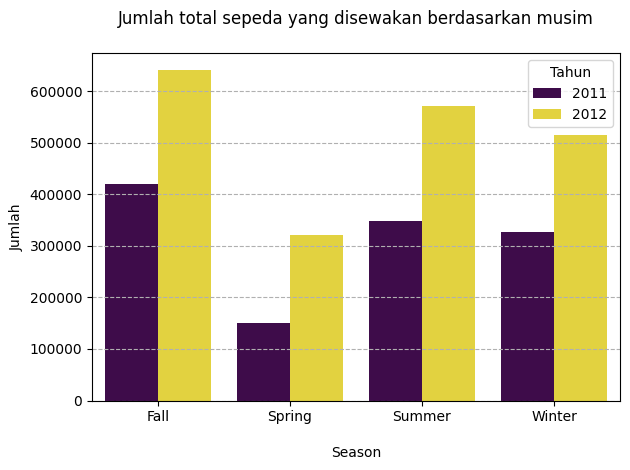

In [150]:
# Visualisasi pengaruh Musim terhadap Penyewaan Sepeda
season_counts = day_df.groupby(by=["season", "year"]).agg({
    "total": "sum"
}).reset_index()

sns.barplot(data=season_counts, x="season", y="total", hue="year", palette="viridis")
plt.xlabel("\nSeason")
plt.ylabel("Jumlah")
plt.title("Jumlah total sepeda yang disewakan berdasarkan musim\n")
plt.legend(title="Tahun", loc="upper right")
plt.grid(True, axis='y', linestyle='--')
plt.tight_layout()
plt.show()

- Musim Panas (Summer) :
 - Jumlah total sepeda yang disewakan pada musim panas mencapai sekitar 570,000.
 - Ini adalah jumlah tertinggi untuk kedua tahun (2011 dan 2012 ).

- Musim Gugur (Fall) :
Jumlah total sepeda yang disewakan pada musim gugur mencapai sekitar 650,000 untuk tahun 2012 dan sekitar 300,000 untuk tahun 2012.
Meskipun ada perbedaan antar tahun, musim gugur tetap menunjukkan pola penggunaan yang tinggi, mungkin karena suhu yang masih nyaman untuk bersepeda.
Musim Semi (Spring) :
Jumlah total sepeda yang disewakan pada musim semi relatif rendah dibandingkan musim lainnya.
Untuk tahun 2011, jumlahnya sekitar 150,000 , sedangkan untuk tahun 2012 sekitar 300,000 .
Perbedaan antar tahun cukup signifikan, yang bisa dipengaruhi oleh faktor seperti cuaca atau tren penggunaan sepeda.
Musim Dingin (Winter) :
Jumlah total sepeda yang disewakan pada musim dingin paling rendah dibandingkan musim lainnya.
Untuk tahun 2011, jumlahnya sekitar 300,000 , sedangkan untuk tahun 2012 sekitar 500,000 .
Cuaca dingin dan kondisi buruk pada musim dingin tampaknya menjadi hambatan bagi penggunaan sepeda.

### Pertanyaan 2: Bagaimana pola penyewaan sepeda antara hari kerja dan hari libur?

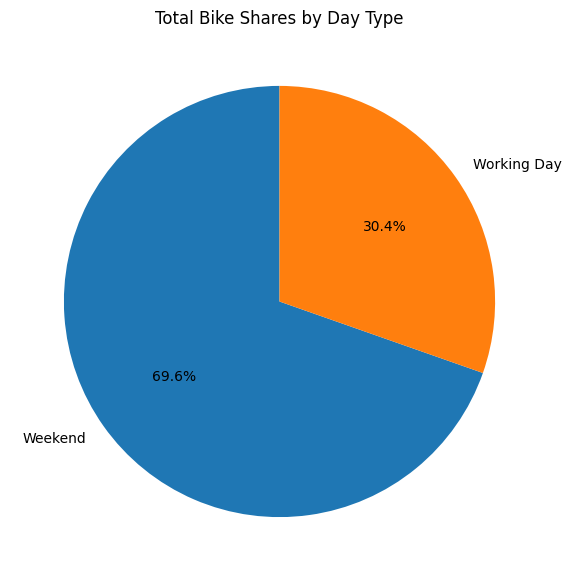

In [151]:
# membuat pie chart untuk persentase jumlah pengguna dalam hari kerja/akhir pekan
day_type_totals = day_df.groupby('day_type')['total'].sum()

plt.figure(figsize=(7, 7))
plt.pie(day_type_totals, labels=day_type_totals.index, autopct='%1.1f%%', startangle=90)
plt.title('Total Bike Shares by Day Type')
plt.show()

Pola penyewaan sepeda menunjukkan bahwa penggunaan sepeda lebih tinggi pada akhir pekan (weekend) dibandingkan hari kerja. Hal ini mengindikasikan bahwa orang cenderung menggunakan sepeda untuk rekreasi atau aktivitas luar ruang di akhir pekan, sementara pada hari kerja, penggunaan sepeda lebih rendah karena dipengaruhi oleh rutinitas harian dan kebutuhan transportasi.

### Pertanyaan 3: Seperti apa dampak kondisi cuaca terhadap jumlah pengguna sepeda.

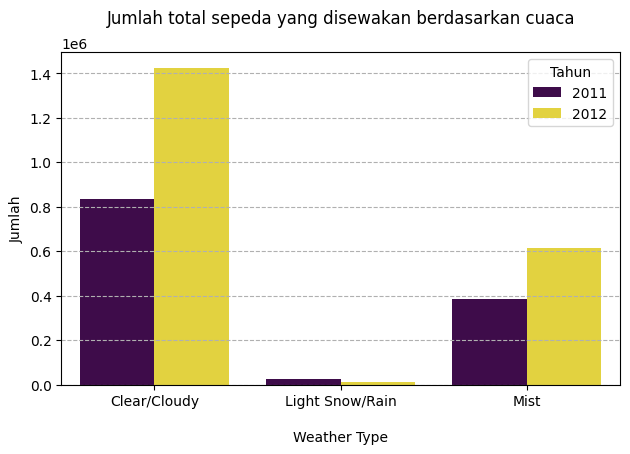

In [152]:
# Visualisasi pengaruh Cuaca terhadap Penyewaan Sepeda
weather_counts = day_df.groupby(by=["weather_type", "year"]).agg({
    "total": "sum"
}).reset_index()


sns.barplot(data=weather_counts, x="weather_type", y="total", hue="year", palette="viridis")
plt.xlabel("\nWeather Type")
plt.ylabel("Jumlah")
plt.title("Jumlah total sepeda yang disewakan berdasarkan cuaca\n")
plt.legend(title="Tahun", loc="upper right")
plt.grid(True, axis='y', linestyle='--')
plt.tight_layout()
plt.show()

- Clear/Cloudy (Cerah/Berawan): Jumlah penyewaan sepeda tertinggi terjadi pada cuaca cerah atau berawan, dengan penyewaan lebih tinggi pada tahun 2012 dibandingkan tahun 2011.

- Light Snow/Rain (Hujan Ringan/Salju Ringan): Penyewaan sepeda pada kondisi cuaca ini relatif lebih rendah, dengan sedikit penurunan pada tahun 2012 dibandingkan tahun 2011.

- Mist (Berkabut): Penyewaan sepeda pada kondisi berdebu/kabut cenderung lebih rendah di tahun 2011, namun mengalami peningkatan signifikan pada tahun 2012.

## Analisis Lanjutan : Clustering

**Tujuan dari penggunaan teknik clustering adalah untuk mengidentifikasi pola atau kelompok dalam data penggunaan sepeda berbagi pada basis bulanan. Dengan mengelompokkan data menjadi beberapa cluster, kita dapat mengetahui tren musiman dalam penggunaan sepeda berbagi dan merencanakan operasi yang lebih efisien untuk tiap periode waktu.**

**Alasan menggunakan teknik clustering:**

- Identifikasi pola musiman: Teknik ini membantu untuk memahami apakah ada pola penggunaan sepeda berbagi yang bergantung pada musim, yang sangat berguna dalam perencanaan operasional dan manajemen sumber daya.

- Optimasi sumber daya: Dengan mengetahui bulan mana yang termasuk dalam cluster penggunaan rendah, sedang, atau tinggi, operator sepeda berbagi dapat mengatur jumlah sepeda, staf, dan infrastruktur dengan lebih efisien.

- Pemahaman perilaku pengguna: Dengan mengelompokkan bulan berdasarkan total penggunaan, kita dapat lebih mudah memetakan bagaimana perilaku pengguna berubah sepanjang tahun.



In [155]:
# menampilkan data jumlah rata-rata pengguna berdasarkan bulan
day_df.groupby(by = ['month']).agg({
    'casual' : ['sum'],
    'registered' : ['sum'],
    'total' : ['sum']
}).sort_values([('total', 'sum')], ascending = False)

,casual,registered,total
,sum,sum,sum
month,,,
Aug,72039,279155,351194
Jun,73906,272436,346342
Sep,70323,275668,345991
Jul,78157,266791,344948
May,75285,256401,331686
Oct,59760,262592,322352
Apr,60802,208292,269094
Nov,36603,218228,254831


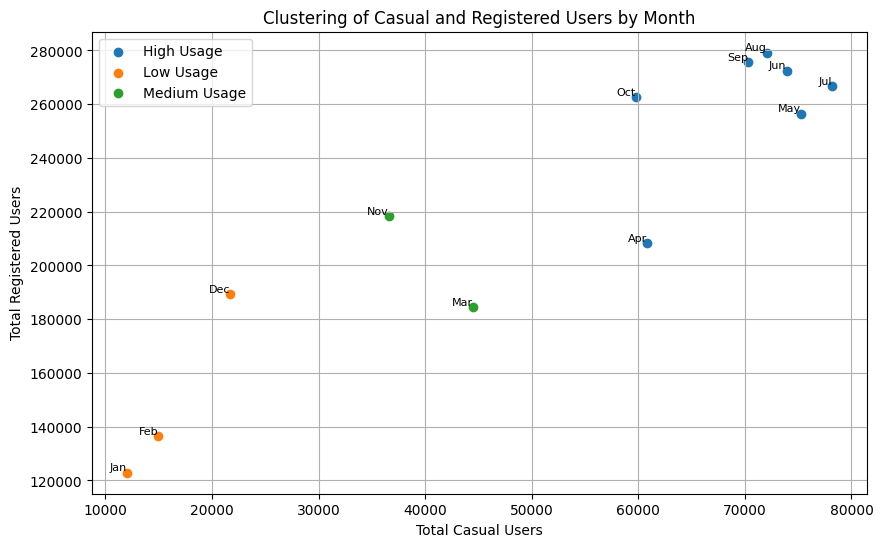

In [156]:
def casual_and_registered(df, low_threshold=(30000, 200000), medium_threshold=(50000, 300000)):
    required_columns = {'month', 'casual', 'registered'}

# Grouping data bedasarkan bulan dan menggabungkan kolom casual dan registered (hanya tampilkan sum)
    monthly_data = df.groupby('month').agg({'casual': 'sum', 'registered': 'sum'})

    clusters = {}
    low_casual, low_registered = low_threshold
    med_casual, med_registered = medium_threshold

# klasifikasikan bulan menjadi 3 cluster berbeda berdasarkan jumlah casual dan jumlah registered
    for month, row in monthly_data.iterrows():
        casual = row['casual']
        registered = row['registered']

        if casual < low_casual and registered < low_registered:
            cluster_name = 'Low Usage'
        elif casual < med_casual and registered < med_registered:
            cluster_name = 'Medium Usage'
        else:
            cluster_name = 'High Usage'

        if cluster_name not in clusters:
            clusters[cluster_name] = []
        clusters[cluster_name].append((casual, registered, month))

    plt.figure(figsize=(10, 6))

    num_clusters = len(clusters)

    for i, (cluster_name, dots) in enumerate(clusters.items()):
        x_values = [point[0] for point in dots]
        y_values = [point[1] for point in dots]
        month_labels = [point[2] for point in dots]

        plt.scatter(x_values, y_values, label=cluster_name)

      # memberi titik data label masing-masing
        for j, month in enumerate(month_labels):
            plt.text(x_values[j], y_values[j], month, fontsize=8, ha='right', va='bottom')

    plt.xlabel('Total Casual Users')
    plt.ylabel('Total Registered Users')
    plt.title('Clustering of Casual and Registered Users by Month')
    plt.legend()
    plt.grid(True)
    plt.show()

casual_and_registered(hour_df, low_threshold=(30000, 200000), medium_threshold=(50000, 300000))

**Metodologi yang Digunakan:**

 Untuk melakukan analisis ini, teknik clustering digunakan untuk mengelompokkan bulan-bulan berdasarkan jumlah penggunaan sepeda berbagi. Berikut adalah metodologi yang digunakan:

1. **Pemilihan fitur:**

 - Data yang digunakan adalah total penggunaan sepeda berbagi pada basis bulanan.

 - Fitur utama yang digunakan dalam clustering adalah total penggunaan sepeda untuk setiap bulan.

2. **Pengelompokan (Clustering):**

 - Setelah menghitung jumlah penggunaan sepeda per bulan, data tersebut diklusterkan menjadi tiga kategori:

 - 1. Low Usage Cluster (Penggunaan rendah)

 - 2. Medium Usage Cluster (Penggunaan sedang)

 - 3. High Usage Cluster (Penggunaan tinggi)

  - Pengelompokan ini didasarkan pada jumlah penyewaan sepeda yang ditemukan di setiap bulan. Secara khusus:

 - 1. Low Usage Cluster: Januari dan Februari dengan total penggunaan sekitar 13k hingga 15k sepeda.

 - 2. Medium Usage Cluster: Desember, November, dan Maret dengan total penggunaan sekitar 21k hingga 25k sepeda.

 - 3. High Usage Cluster: April, Oktober, Mei, Juli, September, Juni, dan Agustus dengan total penggunaan lebih dari 25k sepeda.

3. **Teknik Clustering yang Digunakan:**

 - K-means clustering atau teknik sejenis dapat digunakan untuk mengelompokkan bulan berdasarkan jumlah total penyewaan sepeda.

 - Teknik ini memastikan bahwa bulan yang memiliki penggunaan sepeda yang mirip (baik rendah, sedang, atau tinggi) akan masuk ke dalam kelompok yang sama.

**Manfaat dan Relevansi Teknik yang Diterapkan:**

- **Perencanaan Operasional yang Lebih Baik:** Dengan mengetahui bulan yang termasuk dalam cluster penggunaan rendah, sedang, atau tinggi, operator sepeda berbagi dapat mengatur jumlah sepeda yang tersedia, staf yang dibutuhkan, dan kebijakan pemeliharaan dengan lebih tepat. Misalnya, pada bulan dengan penggunaan tinggi, operator dapat menambah sepeda dan petugas untuk memenuhi permintaan yang lebih tinggi.

- **Pemahaman Tren Musiman:** Clustering memberikan wawasan lebih dalam mengenai bagaimana penggunaan sepeda berbagi bergantung pada musim. Hal ini membantu perusahaan memahami perilaku pengguna sepeda berbagi berdasarkan waktu tahun dan mengantisipasi kebutuhan musim depan.

- **Optimasi Infrastruktur dan Sumber Daya:** Dengan analisis yang mendalam, sumber daya terbatas, seperti stasiun penyewaan sepeda dan perawatan sepeda, dapat dikelola lebih efisien sesuai dengan kebutuhan tiap bulan. Ini juga membantu dalam menentukan area yang perlu lebih banyak sumber daya (seperti sepeda) selama musim ramai, atau mengurangi infrastruktur di bulan-bulan dengan penggunaan rendah.



## Conclusion



- **Pengaruh Musim terhadap Perilaku Penyewaan Sepeda:**

 Jumlah total sepeda yang disewakan pada Musim Panas (Summer) mencapai sekitar 570,000 sepeda, yang merupakan jumlah tertinggi untuk kedua tahun (2011 dan 2012), menunjukkan bahwa cuaca hangat mendorong lebih banyak penggunaan sepeda. Musim Gugur (Fall) mencatatkan sekitar 650,000 sepeda pada tahun 2012 dan sekitar 300,000 sepeda pada tahun 2011, dengan perbedaan yang mungkin disebabkan oleh suhu yang masih nyaman untuk bersepeda. Musim Semi (Spring) memiliki jumlah penyewaan yang relatif rendah dibandingkan musim lainnya, dengan sekitar 150,000 sepeda pada tahun 2011 dan 300,000 sepeda pada tahun 2012, menunjukkan adanya perubahan yang signifikan antar tahun yang dapat dipengaruhi oleh cuaca atau tren penggunaan sepeda. Musim Dingin (Winter) menunjukkan penyewaan sepeda yang paling rendah, yaitu sekitar 300,000 sepeda pada tahun 2011 dan 500,000 sepeda pada tahun 2012, meskipun ada peningkatan pada tahun 2012, cuaca dingin tetap menjadi hambatan utama bagi penggunaan sepeda.

- **Pola Penyewaan Sepeda antara Hari Kerja dan Hari Libur:**

 Pola penyewaan sepeda menunjukkan bahwa penggunaan sepeda lebih tinggi pada akhir pekan (weekend) dibandingkan dengan hari kerja (weekdays). Hal ini menunjukkan bahwa orang lebih cenderung menggunakan sepeda untuk rekreasi atau aktivitas luar ruangan di akhir pekan, sementara pada hari kerja, penggunaan sepeda lebih rendah karena dipengaruhi oleh rutinitas harian dan kebutuhan transportasi.

- **Dampak Kondisi Cuaca terhadap Jumlah Pengguna Sepeda:**

 Jumlah penyewaan sepeda tertinggi terjadi pada cuaca Cerah/Berawan (Clear/Cloudy), dengan penyewaan yang lebih tinggi pada tahun 2012 dibandingkan tahun 2011. Pada kondisi cuaca Hujan Ringan/Salju Ringan (Light Snow/Rain), penyewaan sepeda relatif lebih rendah, dengan sedikit penurunan pada tahun 2012 dibandingkan tahun 2011. Sementara itu, pada kondisi Berkabut (Mist), penyewaan sepeda lebih rendah pada tahun 2011, namun mengalami peningkatan signifikan pada tahun 2012.

- **Analisis Lanjutan:**

 - Cluster Penggunaan Rendah (Low Usage Cluster): Januari dan Februari termasuk dalam cluster penggunaan rendah, dengan total penyewaan sekitar 13k hingga 15k sepeda per bulan. Bulan-bulan ini berada di musim dingin dengan suhu yang lebih rendah, yang menyebabkan lebih sedikit aktivitas luar ruangan, sehingga penggunaan sepeda berbagi menjadi rendah.

 - Cluster Penggunaan Sedang (Medium Usage Cluster): Desember, November, dan Maret termasuk dalam cluster penggunaan sedang, dengan total penyewaan sekitar 21k hingga 25k sepeda per bulan. Bulan-bulan ini berada di musim transisi antara musim dingin dan musim semi, dengan cuaca yang lebih sejuk. Meskipun tidak ideal untuk bersepeda, cuaca tersebut tetap memungkinkan penyewaan sepeda dengan angka yang sedang.

 - Cluster Penggunaan Tinggi (High Usage Cluster): April, Oktober, Mei, Juli, September, Juni, dan Agustus termasuk dalam cluster penggunaan tinggi, dengan total penyewaan lebih dari 25k sepeda per bulan. Bulan-bulan ini mencakup musim semi hingga musim panas, dengan suhu yang lebih tinggi dan banyaknya aktivitas luar ruangan, yang mendorong lebih banyak penggunaan sepeda berbagi, sehingga penyewaannya tinggi.

In [153]:
day_df.to_csv("data/day.csv", index=False)